# Demand Markov Process

### Input Variables:

$M_D$ Maximum Demand Shock $\max_D$  
$m_D$ Minimum Demand Shock $\min_D$  
$\rho$   Autocorrelation of Demand Shock  
$N_D$ Number of Demand Shocks  
  
$d$ Standard Deviation from the Mean to the Max/Min

### Output Variables:

$\mathbb{D}$ Grid with Demand Shock Realizations  
$\Pi_D$ Transition Matrix for the Markov Process of the Demand Shock

## Function:

As of: 21/04/2015

In [1]:
using Distributions

function Demand(M::Float64,m::Float64,ρ::Float64,N::Int,d::Float64)
    
    """Create the Demand Grid and the
    Markov Transition Matrix of the
    Demand Shock

    Parameters
    ----------
    M: Maximum Demand Shock
    m: Minimum Demand Shock 
    ρ: Autocorrelation
    N: Number of Demand Shocks
    d: Standard Deviation from the Mean to the Max/Min
    
    Output
    ----------
    D   : Grid with Demand Shock Realizations
    Tran: Transition Matrix for the Markov Process of the Demand Shock 
    """
    
    Mean=((M+m)/2);
    
    w=(M-m)/(N-1);
    
    stvy=(M-Mean)/d;
    
    sigma=sqrt(stvy^2*(1-ρ^2));

    D=[m:w:M];
    
    s=D-Mean;
    
    dNorm=Normal(0,sigma);
    
    Tran=zeros(N,N);
    
    for i=1:N
        
        Tran[i,1]=cdf(dNorm,s[1]-ρ*s[i]+w/2);
        
        for j=2:N-1
            
            Tran[i,j]=cdf(dNorm,s[j]-ρ*s[i]+w/2)-cdf(dNorm,s[j]-ρ*s[i]-w/2);    # 89/189 = 47%
            
        end
        
        Tran[i,N]=1-cdf(dNorm,s[N]-ρ*s[i]-w/2);
        
        # Normalize
        
        Tran[i,:]=Tran[i,:]/sum(Tran[i,:]);                                     # 72/189 = 38%
        
    end

    return D, Tran
    
end

Demand (generic function with 1 method)

In [2]:
72/189

0.38095238095238093

## Growing Size

$N_D$

In [3]:
M=10.;
m=0.;
ρ=0.8;
d=2.;

## Time

Max Size and Sample Size

In [4]:
Ms=400;
Ss=3;

### Test

In [5]:
# Warm Up Run
Demand(M,m,ρ,Ms,d)   #

t=[1.0:Ms-1];
b=[1.0:Ss];

for i=2:Ms
    
    for j=1:Ss
    
        a=@elapsed Demand(M,m,ρ,i,d)
        b[j]=a;
        
    end
    
    t[i-1]=minimum(b);
    
end

### Plot Result

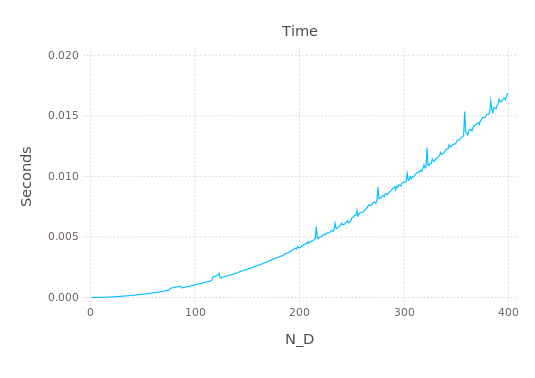

In [6]:
using Gadfly

plot(x=[1:Ms], y=t,Guide.xlabel("N_D"),Guide.ylabel("Seconds"),Guide.title("Time"), Geom.line)

## Memory

Max Size and Sample Size

In [8]:
Ms=400;
Ss=1;

### Test

In [9]:
# Warm up run
Demand(M,m,ρ,Ms,d)    #

t=[1.:Ms-1];
b=[1.:Ss];

for i=2:Ms
    
    for j=1:Ss
    
        a=@allocated Demand(M,m,ρ,i,d)
        b[j]=a/10^6.;
        
    end
    
    t[i-1]=minimum(b);
    
end

### Plot Result

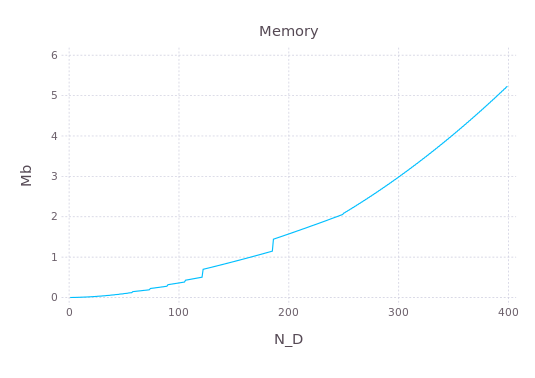

In [10]:
plot(x=[1:Ms], y=t,Guide.xlabel("N_D"),Guide.ylabel("Mb"),Guide.title("Memory"), Geom.line)

## Profile

In [11]:
M=10.;
m=0.;
ρ=0.8;
N=10;
d=2.;

Sample Size

In [12]:
Rep=10000;

In [13]:
Profile.clear()
@profile (for i=1:Rep;Demand(M,m,ρ,N,d);end)
Profile.print()

250 task.jl; anonymous; line: 340
 250 .../IJulia/src/IJulia.jl; eventloop; line: 123
  250 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 160
   250 loading.jl; include_string; line: 97
    250 profile.jl; anonymous; line: 2
     18  In[1]; Demand; line: 31
      2 ./range.jl; colon; line: 132
       2 ./range.jl; rat; line: 114
      9 ./range.jl; colon; line: 135
       7 ./range.jl; rat; line: 114
        1 ./int.jl; <=; line: 0
       2 ./range.jl; rat; line: 116
      2 ./range.jl; colon; line: 139
      1 ./range.jl; colon; line: 142
      4 range.jl; vcat; line: 501
     3   In[1]; Demand; line: 37
      1 array.jl; fill!; line: 151
     13  In[1]; Demand; line: 41
     76  In[1]; Demand; line: 45
     4   In[1]; Demand; line: 49
     134 In[1]; Demand; line: 53
      1   abstractarray.jl; trailingsize; line: 56
      2   array.jl; ./; line: 759
      3   array.jl; ./; line: 761
      4   multidimensional.jl; getindex; line: 49
      120 multidimensional.jl; getind